<a href="https://colab.research.google.com/github/HellStriker/OnlineRetail/blob/Project1/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:



# Load the dataset into a DataFrame without specifying the engine
df = pd.read_excel(r'/content/Online Retail.xlsx')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Understanding Dataset

In [27]:
df.shape

(541909, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [29]:
# Check the data types
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [30]:
# Get a summary of the dataset
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [36]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
# Replace missing CustomerIDs with "00000"
df['CustomerID'].fillna('00000', inplace=True)

# Check if there are any missing values left
missing_values_after = df['CustomerID'].isnull().sum()
print("Missing CustomerIDs after handling:", missing_values_after)


Missing CustomerIDs after handling: 0


Description of Quantity column:
 count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


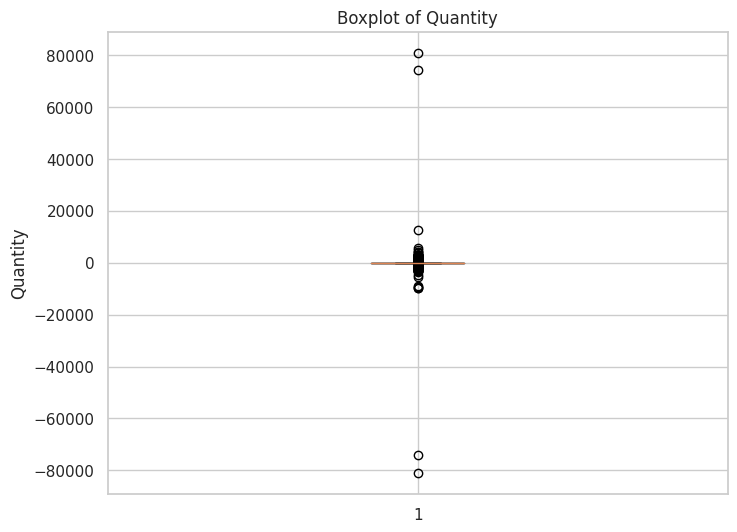

In [31]:
# Describe the Quantity column to understand its distribution
quantity_description = df['Quantity'].describe()
print("Description of Quantity column:\n", quantity_description)

# Visualize the distribution of Quantity using a boxplot


plt.figure(figsize=(8, 6))
plt.boxplot(df['Quantity'])
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')
plt.show()


In [54]:
# Iterate over rows with missing descriptions
for index, row in missing_description_rows.iterrows():
    stock_code = row['StockCode']
    # Find corresponding descriptions for the same stock code
    corresponding_descriptions = df[df['StockCode'] == stock_code]['Description'].dropna()
    if not corresponding_descriptions.empty:
        # Replace missing description with the first corresponding one
        corresponding_description = corresponding_descriptions.iloc[0]
        df.at[index, 'Description'] = corresponding_description

# Check if there are any missing descriptions left
missing_values_after = df['Description'].isnull().sum()
print("Missing Descriptions after handling:", missing_values_after)


Missing Descriptions after handling: 0


In [53]:
# Impute missing values in the 'Description' column with the most frequent description
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

# Check if there are any missing descriptions left
missing_values_after = df['Description'].isnull().sum()
print("Missing Descriptions after handling:", missing_values_after)


Missing Descriptions after handling: 0


In [56]:
# Add new columns for month, day name, year, time, and hour
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day_Name'] = df['InvoiceDate'].dt.day_name()
df['Year'] = df['InvoiceDate'].dt.year
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour


In [58]:
# Export the updated DataFrame to an Excel file
df.to_excel('/content/updated_online_retail.xlsx', index=False)


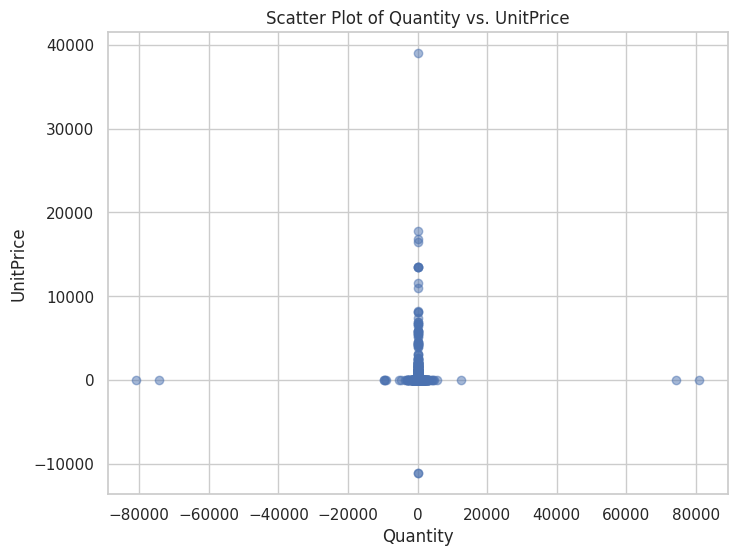

Correlation coefficient between Quantity and UnitPrice: -0.0012349245448702957


In [60]:
# Scatter plot of Quantity vs. UnitPrice
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5)
plt.title('Scatter Plot of Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

# Calculate correlation coefficient
correlation = df['Quantity'].corr(df['UnitPrice'])
print("Correlation coefficient between Quantity and UnitPrice:", correlation)


In [63]:
# Calculate correlation coefficient between CustomerID and UnitPrice
correlation_customer_unitprice = df['Quantity'].corr(df['UnitPrice'])
print("Correlation coefficient between Quantity and UnitPrice:", correlation_customer_unitprice)


Correlation coefficient between Quantity and UnitPrice: -0.0012349245448702957


In [88]:
popularity_of_product = df.pivot_table(
    index=['StockCode','Description'],
    values='Quantity',
    aggfunc='sum').sort_values(
    by='Quantity',ascending = False)
print('Top 10 popular product')
popularity_of_product.head(10)

Top 10 popular product


,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
85099B,JUMBO BAG RED RETROSPOT,47363
84879,ASSORTED COLOUR BIRD ORNAMENT,36381
22197,POPCORN HOLDER,36334
21212,PACK OF 72 RETROSPOT CAKE CASES,36039
85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025
23084,RABBIT NIGHT LIGHT,31012
22492,MINI PAINT SET VINTAGE,26437
22616,PACK OF 12 LONDON TISSUES,26315


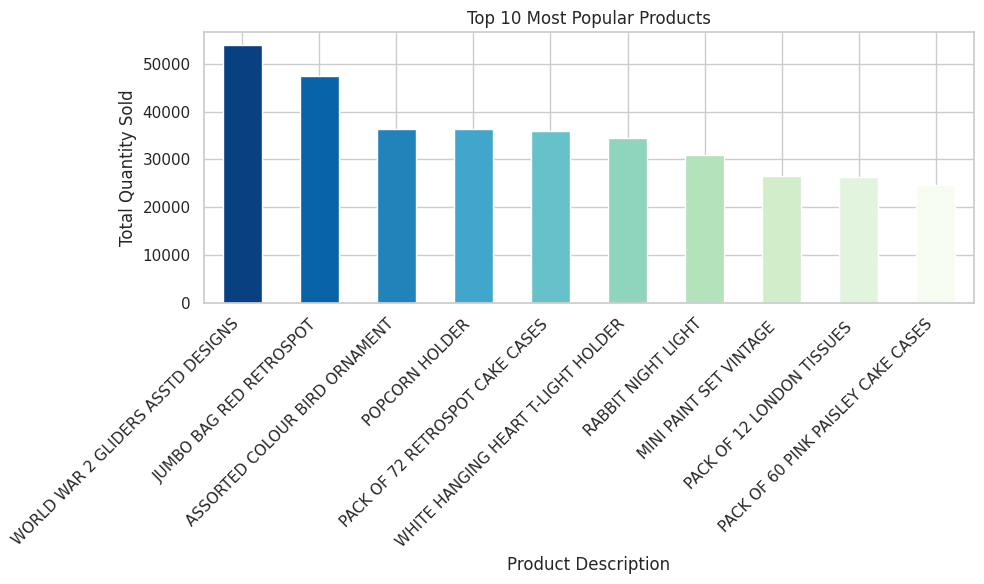

In [83]:
# Get the top 10 most popular products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Define custom colormap with lighter green to darker green gradient and reverse it
colors = plt.cm.GnBu_r(np.linspace(0, 1, len(top_products)))

# Plot the bar chart with custom color gradient
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color=colors)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


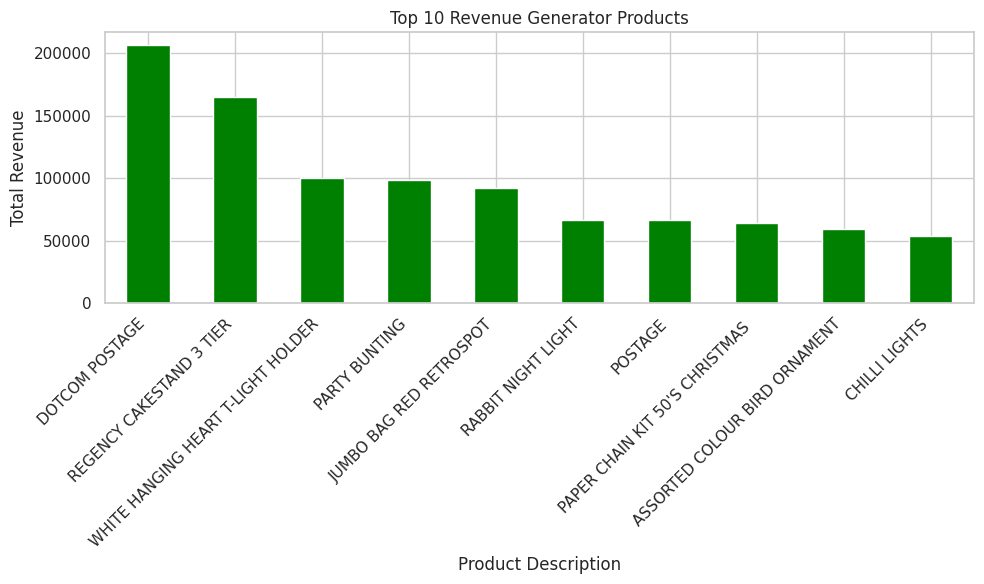

In [93]:
# Calculate total revenue generated for each product
df['Revenue'] = df['Quantity'] * df['UnitPrice']
top_revenue_products = df.groupby('Description')['Revenue'].sum().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_revenue_products.plot(kind='bar', color='green')
plt.title('Top 10 Revenue Generator Products')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


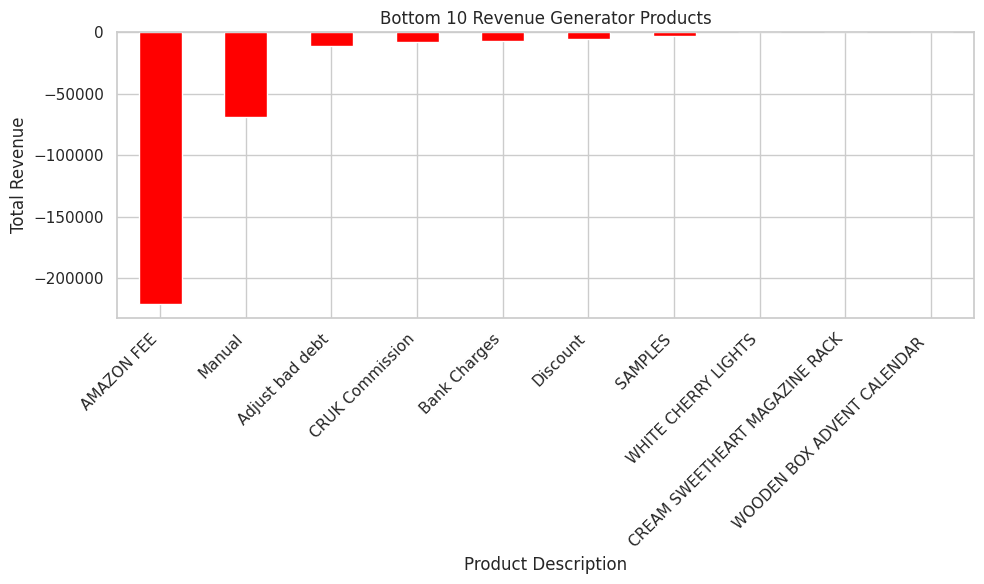

In [92]:
# Calculate total revenue generated for each product
df['Revenue'] = df['Quantity'] * df['UnitPrice']
bottom_revenue_products = df.groupby('Description')['Revenue'].sum().nsmallest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bottom_revenue_products.plot(kind='bar', color='red')
plt.title('Bottom 10 Revenue Generator Products')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


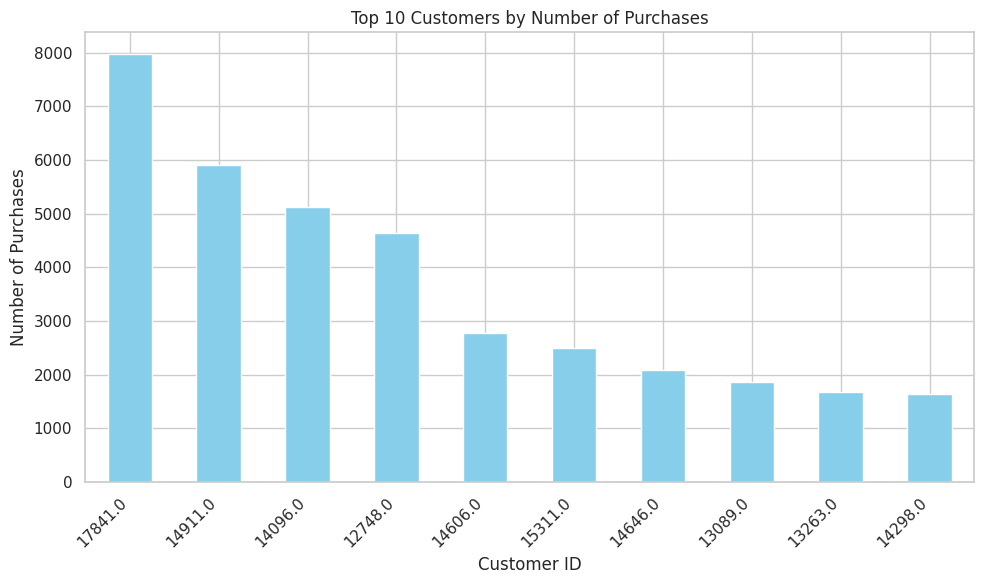

In [94]:
import matplotlib.pyplot as plt

# Get the top 10 customers based on number of purchases
top_customers = df['CustomerID'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Number of Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Country wise Insights

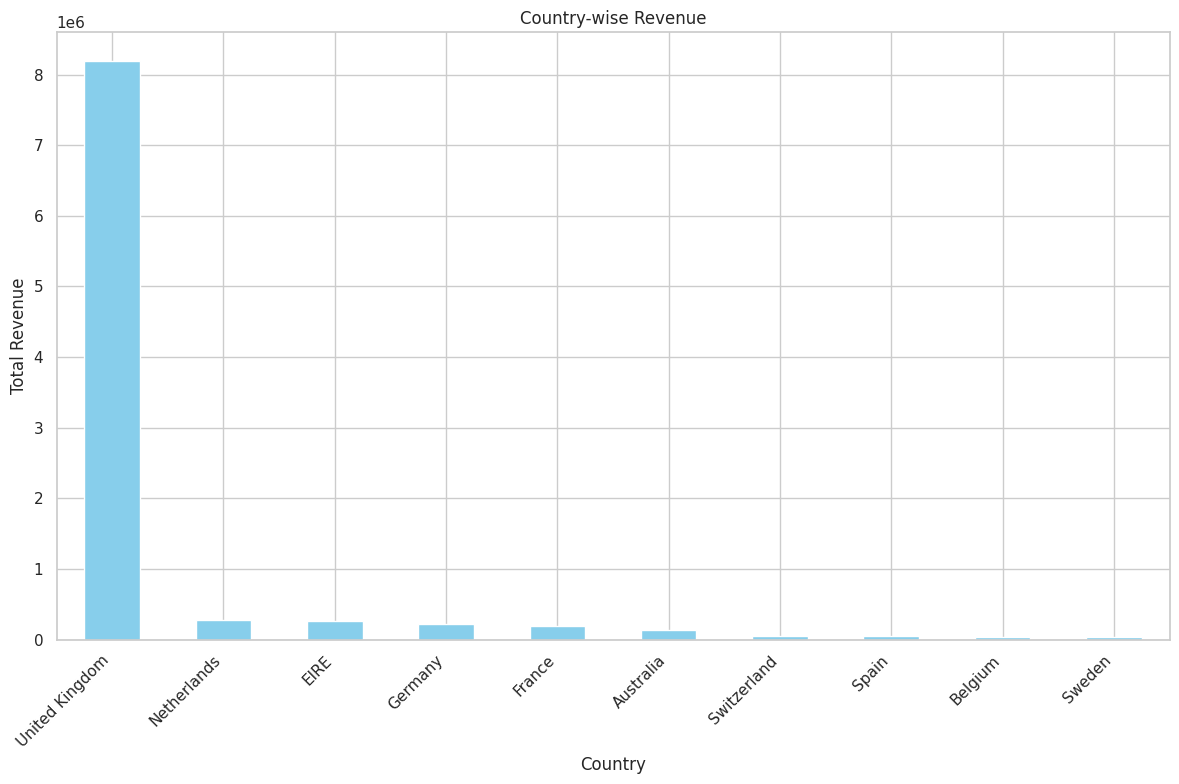

In [99]:
# Calculate total revenue generated in each country
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Store the country-wise revenue in a separate variable
country_revenue_data = country_revenue.to_dict()

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
country_revenue.plot(kind='bar', color='skyblue')
plt.title('Country-wise Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


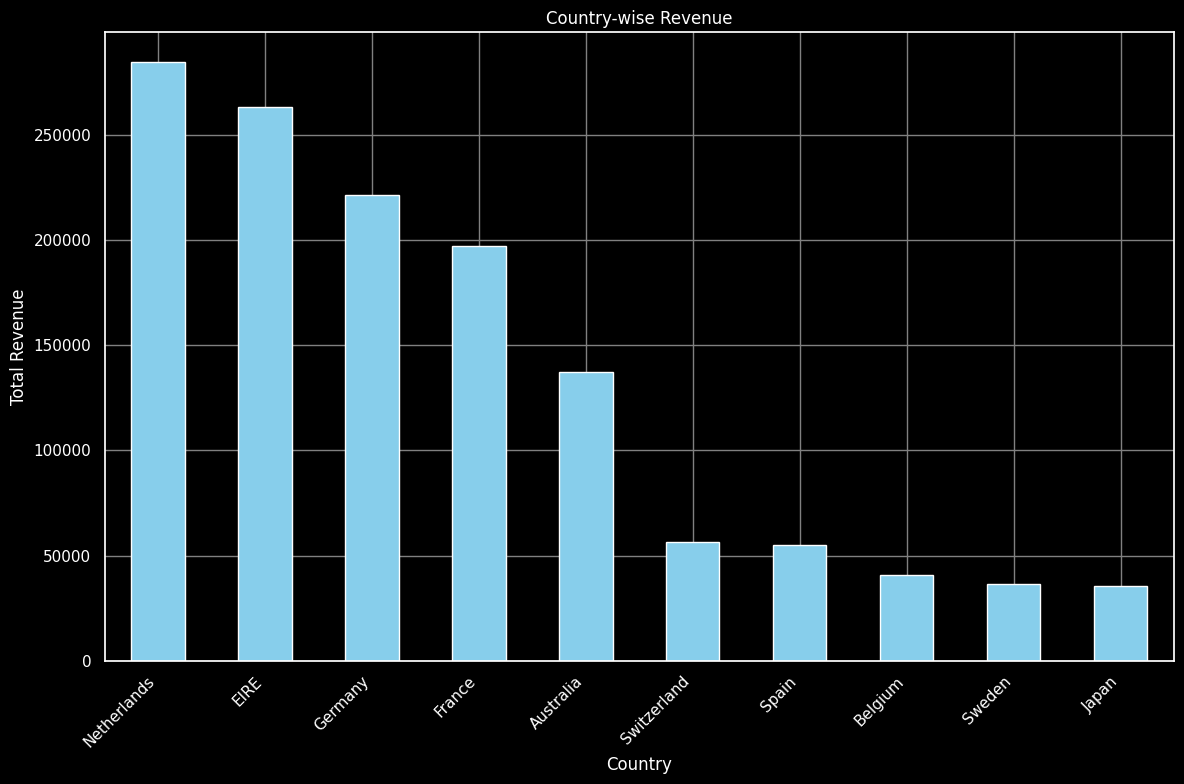

In [131]:
# Calculate total revenue generated in each country
country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Store the country-wise revenue in a separate variable
country_revenue_data = country_revenue.to_dict()

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
country_revenue.plot(kind='bar', color='skyblue')
plt.title('Country-wise Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, color='grey')
plt.show()


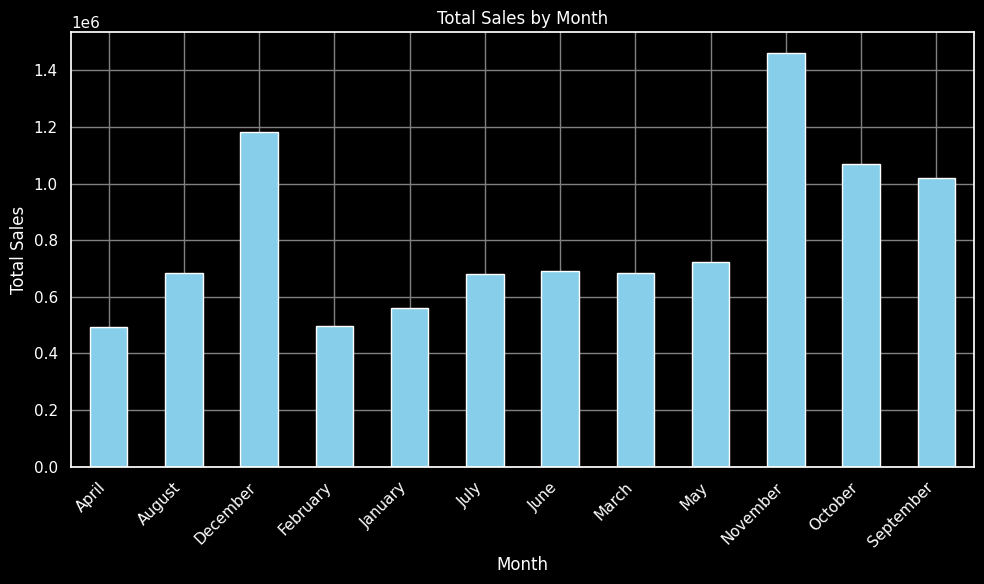

In [123]:
# Extract month names from the 'InvoiceDate' column
df['Month'] = df['InvoiceDate'].dt.month_name()

# Calculate total sales for each month
monthly_sales = df.groupby('Month')['Revenue'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(True, color='grey')
plt.show()


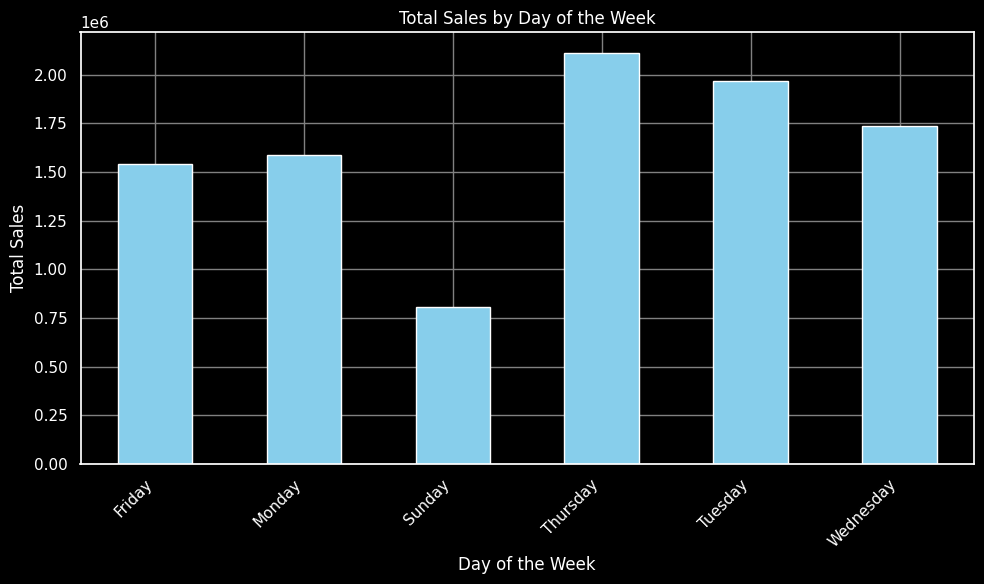

In [122]:
#Extract day of the week from the 'InvoiceDate' column
df['Day_Name'] = df['InvoiceDate'].dt.day_name()

# Calculate total sales for each day of the week
daily_sales = df.groupby('Day_Name')['Revenue'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(True, color='grey')
plt.show()


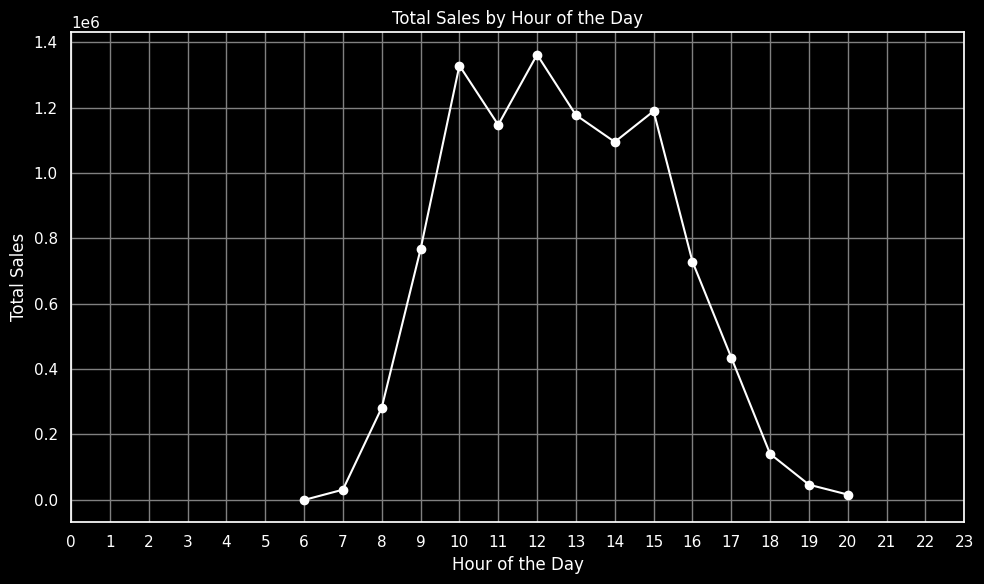

In [126]:
# Set the style to dark background
plt.style.use('dark_background')

# Extract hour from the 'InvoiceDate' column
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate total sales for each hour
hourly_sales = df.groupby('Hour')['Revenue'].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='white')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(24))  # Set x-ticks to show all hours of the day
plt.tight_layout()
plt.grid(True, color='grey')  # Add white grid lines for better readability
plt.show()


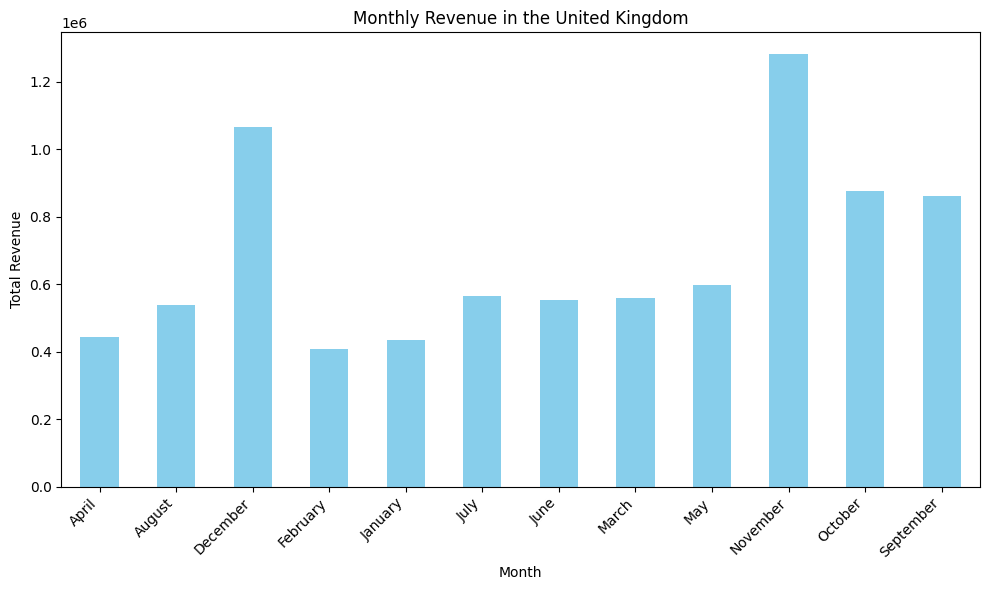

In [136]:
import matplotlib.pyplot as plt

# Filter transactions from the United Kingdom
uk_transactions = df[df['Country'] == 'United Kingdom'].copy()  # Make a copy to avoid modifying the original DataFrame

# Extract month from the 'InvoiceDate' column using .dt accessor
uk_transactions['Month'] = uk_transactions['InvoiceDate'].dt.month_name()

# Calculate total revenue for each month in the United Kingdom
uk_monthly_revenue = uk_transactions.groupby('Month')['Revenue'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.style.use('default')  # Set plot style to 'default'
uk_monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue in the United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [137]:
# Calculate total revenue
total_revenue = df['Revenue'].sum()

# Calculate total number of orders
total_orders = df['InvoiceNo'].nunique()

# Calculate average order value
average_order_value = total_revenue / total_orders

print("Average Order Value:", average_order_value)


Average Order Value: 376.36092409266405


Average order value is:  376.3609240926641


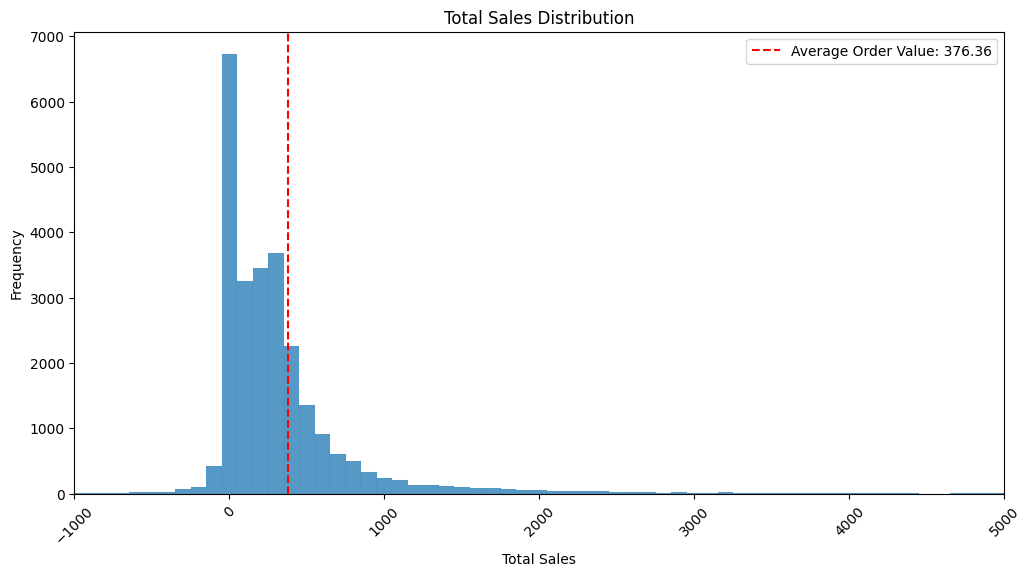

In [141]:
# Calculate average order value
avg_order_value = df.groupby('InvoiceNo')['Revenue'].sum().mean()
print("Average order value is: ", avg_order_value)

# Plot the histogram of order values
plt.figure(figsize=(12, 6))
sns.histplot(df.groupby('InvoiceNo')['Revenue'].sum(), binwidth=100)
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.xlim(-1000, 5000)  # Set x-axis limit for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot average order value line
plt.axvline(x=avg_order_value, color='red', linestyle='--', label='Average Order Value: {:.2f}'.format(avg_order_value))
plt.legend()

plt.show()
